#### Exercise 1

Print the values in the second row. [Hint: Use simple syntax based on previous experience with arrays.]

In [ ]:
#your solution here

In [57]:
#solution
import pandas as pd
df = pd.read_csv('simple.csv')


#accessing rows using basic structure
for a in df:         #running through the columns 
    print(df[a][1])  #fixed second item in each column

LP001003
Male
Yes
4583


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train_data.csv')  #practice data set

#### Exercise 2

Take a look at the distribution of the gender. What do you conclude?

In [ ]:
#your code here

In [59]:
#solution

print(df['Gender'].value_counts())
print()

#represented as percentage
print(df['Gender'].value_counts(normalize=True))

#does not include missing data
sum(df['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


601

#### Exercise 3

Create a box plot of income segregated based on marital status. What conclusions do you draw? How about segregation by property area? What does that say?

In [ ]:
#your code here

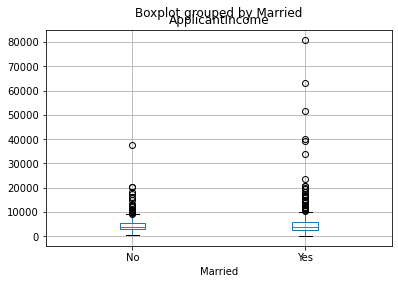

In [60]:
#solution

df.boxplot(column='ApplicantIncome', by = 'Married')

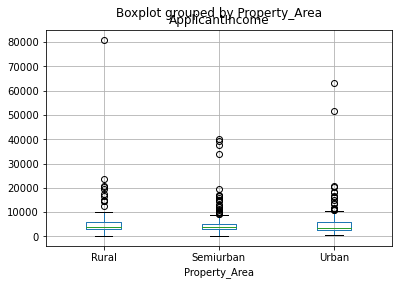

In [61]:
#solution

df.boxplot(column='ApplicantIncome', by = 'Property_Area')

#### Exercise 4

Rewrite the code `aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()` in the form of a function, i.e., write a function that you can pass instead of `lambda x: x.map({'Y':1,'N':0}).mean()` to df.pivot_table. 

In [ ]:
#your code here

In [62]:
#solution

#first lets understand what the aggfunc should do
#it aggregates the data in each category, by default it is the  np.mean
#this time there is a problem as the values are not numerical, for loan status we have values Yes or No, so first we have to 
#change them to numerical and then apply the mean

def aggfunc(array):
    return array.map({'Y':1,'N':0}).mean()     #the method map changes 'y' to 1 and 'N' to 0 in the array and then mean is calculated
    
    
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=aggfunc)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)   
    
    


Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


#### Exercise 5

Plot a similar graphs  by Married, Gender, etc.

In [ ]:
#your code here

In [63]:
#solution

temp1 = df['Married'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Married:') 
print (temp1)

print ('\nProbility of getting loan for each Married class:')
print (temp2)

Frequency Table for Married:
No     213
Yes    398
Name: Married, dtype: int64

Probility of getting loan for each Married class:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


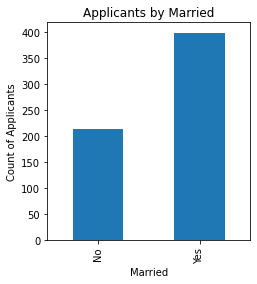

In [66]:
#solution

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Married")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan by married')

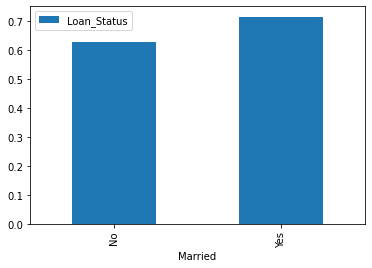

In [67]:
#solution

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Married')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by married")

#### Exercise 6

Rewrite the code `temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])` so that it shows the probability rather than the frequency.

In [ ]:
#your code here

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


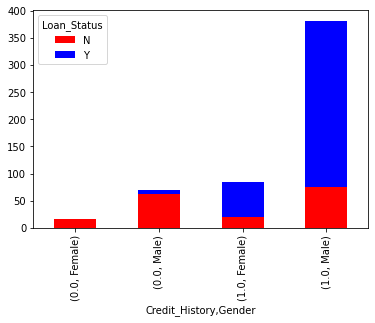

In [107]:
#solution - what we had

temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Loan_Status                   N         Y
Credit_History Gender                    
0.0            Female  0.941176  0.058824
               Male    0.913043  0.086957
1.0            Female  0.238095  0.761905
               Male    0.196335  0.803665


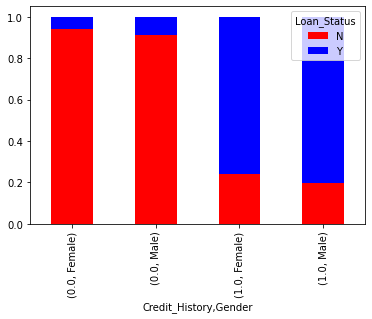

In [106]:
#solution
temp4 = temp3.copy()


for row in range(len(temp3.index)):
    for col in range(len(temp3.columns)): 
        temp4.iloc[row,col] = temp3.iloc[row,col]/sum(temp3.iloc[row,:]) #in each row divide the value by sum of the row
        

print(temp4)
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Loan_Status                   N         Y
Credit_History Gender                    
0.0            Female  0.941176  0.058824
               Male    0.913043  0.086957
1.0            Female  0.238095  0.761905
               Male    0.196335  0.803665


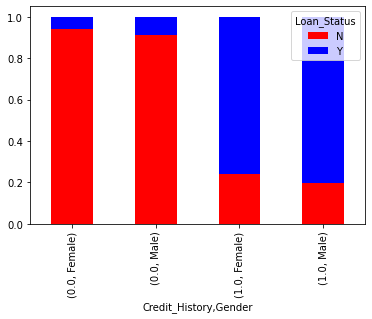

In [2]:
#solution v2.0

temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'], normalize='index')
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)